# Census project

In [1]:
!pip install seaborn

In [2]:
!pip install seaborn

In [3]:
import numpy as np
import csv
import pandas as pd
import json
import seaborn as sns

In [4]:
# Load your data into a DataFrame
census_df = pd.read_csv("./census06 - Copy.csv")


In [5]:
census_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,NaN,Female,Child,None,NaN


In [6]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   object
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 6273 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       6224 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


In [7]:
census_df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2056
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2105
dtype: int64

In [8]:
# Import the numpy library
import numpy as np
# Replace all blank spaces in the dataframe with NaN values using a regular expression
census_dataframe = census_df.replace(r'^\s*$', np.nan, regex=True)
# Display information about the dataframe
census_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8328 non-null   object
 3   Surname                        8328 non-null   object
 4   Age                            8327 non-null   object
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 6270 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8321 non-null   object
 10  Religion                       6220 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


In [9]:
census_dataframe.isna().sum()

House Number                        0
Street                              0
First Name                          1
Surname                             1
Age                                 2
Relationship to Head of House       0
Marital Status                   2059
Gender                              0
Occupation                          0
Infirmity                           8
Religion                         2109
dtype: int64

# Names column

In [10]:
census_dataframe[census_dataframe['First Name'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,NaN,Taylor,59,Head,Married,Male,Health and safety adviser,None,None


In [11]:
# Define the values you want to search for
house_number_value = 10
street_value = 'Thomas Drive'

# Create a boolean mask to identify rows where the house_number and street columns have the specified values
mask = (census_dataframe['House Number'] == house_number_value) & (census_dataframe['Street'] == street_value)

# Use the boolean mask to index the DataFrame and select only the rows that meet the specified condition
selected_rows = census_dataframe[mask]

selected_rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,NaN,Taylor,59,Head,Married,Male,Health and safety adviser,None,None
7259,10,Thomas Drive,Kerry,Taylor,57,Wife,Married,Female,"Pilot, airline",None,None


In [12]:
census_dataframe[census_dataframe['Surname'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5553,5,Gill Mews,Owen,NaN,8,Son,NaN,Male,Student,None,NaN


In [13]:
# Define the values you want to search for
house_number_value = 5
street_value = 'Gill Mews'

# Create a boolean mask to identify rows where the house_number and street columns have the specified values
mask = (census_dataframe['House Number'] == house_number_value) & (census_dataframe['Street'] == street_value)

# Use the boolean mask to index the DataFrame and select only the rows that meet the specified condition
selected_rows = census_dataframe[mask]

selected_rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5552,5,Gill Mews,Joyce,Adams,32,Head,Divorced,Female,Unemployed,None,None
5553,5,Gill Mews,Owen,NaN,8,Son,NaN,Male,Student,None,NaN
5554,5,Gill Mews,Aaron,Adams,7,Son,NaN,Male,Student,None,NaN


In [14]:
#Replace the NA values of owen sir name with the sir name of family; living in same house number and street name
census_dataframe.at[5553,"Surname"]="Adams"
#confirmation if this has been replaced
census_dataframe.at[5553,"Surname"]

'Adams'

# AGE COLUMN

In [15]:
census_dataframe["Age"].unique()

array(['50', '52', '69', '72', '36', '42', '38', '7', '29', '32', '62',
       '80', '56', '55', '25', '17', '63', '23', '22', '39', '41', '2',
       '1', '67', '65', '28', '27', '5', '4', '3', '20', '19', '49',
       '83.71794888354226', '14.0', '66', '82', '83', '44', '15', '21',
       '46', '45', '43', '64', '59', '34', '10', '9', '35', '0', '68',
       '48', '16', '81', '53', '8', '40', '51', '54', '58', '13', '61',
       '26', '47', '74', '79', '75', '70', '71', '102', '73', '24', '60',
       '30', '33', '11', '31', '61.61015620160364', '62.61015620160364',
       '15.0', '10.0', '18', '37', '12', '14', '6', '57', '89', '85',
       '78', '88', '91', '93', '97', '86', '77', '50.03241969022402',
       '51.03241969022402', '1.0', '90', '76', '104', '84', nan, '92',
       '87', '95', '98', '105', '48.65904417229777', '50.65904417229777',
       '12.0', '54.55812337483672', '57.55812337483672', '3.0', '0.0',
       '106', '65.90982310589523', '68.90982310589523', '16.0', '94',

In [16]:
census_dataframe[census_dataframe['Age'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,NaN,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,NaN,Son,Single,Male,University Student,None,Christian


In [17]:
#Converting the string values in Age to int and replace the NaN Values with 888 for ease of identity
census_dataframe['Age'] = pd.to_numeric(census_dataframe['Age'], errors='coerce')
census_dataframe['Age'] = census_dataframe['Age'].round().fillna(888).astype('Int64')

In [18]:
# Filter rows where Age is 888
filtered_df = census_dataframe[census_dataframe['Age'] == 888]
filtered_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,888,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,888,Son,Single,Male,University Student,None,Christian


In [19]:
# Define the values you want to search for
house_number_value = 17
street_value = 'Andrews Mill'

# Create a boolean mask to identify rows where the house_number and street columns have the specified values
mask = (census_dataframe['House Number'] == house_number_value) & (census_dataframe['Street'] == street_value)

# Use the boolean mask to index the DataFrame and select only the rows that meet the specified condition
selected_rows = census_dataframe[mask]

selected_rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2205,17,Andrews Mill,Sophie,Johnson,32,Head,Married,Female,Accounting technician,None,None
2206,17,Andrews Mill,Christopher,Johnson,888,Husband,Married,Male,Wellsite geologist,None,None
2207,17,Andrews Mill,Ronald,Johnson,3,Son,NaN,Male,Child,None,NaN


In [20]:
# Group the data by 'House Number' and 'Street'
grouped = census_dataframe.groupby(['House Number', 'Street'])

# Define a function to calculate the mean age difference for each group
def calc_mean_age_diff(group):
    # Filter rows where Relationship to Head of House is either Head or Husband/Wife/Partner and Age is not 888
    filtered_group = group[(group['Relationship to Head of House'].isin(['Head','Husband','Wife',"Partner"]))
                           & (group['Age'] != 888)]
    
    # Calculate the mean age difference for the group if it has at least two elements
    if len(filtered_group) >= 2:
        mean_age_diff = filtered_group['Age'].diff().mean()
        return mean_age_diff
    else:
        return None

# Apply the function to each group
mean_age_diffs = grouped.apply(calc_mean_age_diff)

# Display one result as an example
print(mean_age_diffs.iloc[0])

3.0


In [21]:
#Replace the 888 age value of christopher with the sum of mean age difference and that of the head of house (32+3)
census_dataframe.at[2206,"Age"]=35
#confirmation if this has been replaced
census_dataframe.at[2206,"Age"]

35

In [22]:
# Define the values you want to search for
house_number_value = 47
street_value = 'Smith Plains'

# Create a boolean mask to identify rows where the house_number and street columns have the specified values
mask = (census_dataframe['House Number'] == house_number_value) & (census_dataframe['Street'] == street_value)

# Use the boolean mask to index the DataFrame and select only the rows that meet the specified condition
selected_rows = census_dataframe[mask]

selected_rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4315,47,Smith Plains,Ellie,Richards,52,Head,Married,Female,Financial adviser,None,Christian
4316,47,Smith Plains,Guy,Richards,48,Husband,Married,Male,Insurance claims handler,None,None
4317,47,Smith Plains,Hugh,Richards,888,Son,Single,Male,University Student,None,Christian


In [23]:
# Filter rows where Relationship to Head of House is either Head or Son and Age is not 888
filtered_df = census_dataframe[(census_dataframe['Relationship to Head of House'].isin(['Head','Son'])) & (census_dataframe['Age'] != 888)]

# Define a custom aggregation function that calculates the age fraction for each group
def age_fraction(x):
    if len(x) < 2 or x.iloc[1] == 0: #if the age of son is zero,make it a non value
        return float('nan')
    else:
        return x.iloc[0] / x.iloc[1]

# Group by House Number and Street and calculate the mean age fraction
grouped_df = filtered_df.groupby(['House Number','Street'])['Age'].agg(age_fraction)

# Calculate the mean age fraction for the entire data frame
mean_age_fraction_son = grouped_df.mean()

# Display result
print(mean_age_fraction_son)

4.888546262930105


In [24]:
#Age of the son is (Age of father/mean age fraction between head/son)
row_4317_son_age=((census_dataframe.at[4315,"Age"])/mean_age_fraction_son)
print(round(row_4317_son_age))

11


In [25]:
census_dataframe.at[4317,"Age"]=(round((row_4317_son_age)))
census_dataframe.at[4317,"Age"]

11

In [26]:
census_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8328 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   Int64 
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 6270 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8321 non-null   object
 10  Religion                       6220 non-null   object
dtypes: Int64(1), int64(1), object(9)
memory usage: 724.0+ KB


# Marital Status

In [27]:
census_dataframe["Marital Status"].unique()

array(['Single', 'Married', 'Divorced', nan, 'Widowed'], dtype=object)

In [28]:
marital_status_counts = census_dataframe["Marital Status"].value_counts(dropna=False)
marital_status_counts

Single      2941
Married     2225
NaN         2059
Divorced     744
Widowed      360
Name: Marital Status, dtype: int64

In [29]:
#Dispalying rows with NaN in the marital status page
mask = census_dataframe["Marital Status"].isna()
census_dataframe[mask]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Scott Dale,Jamie,Akhtar,7,Son,NaN,Male,Student,None,NaN
15,7,Scott Dale,Alex,O'Neill-Walker-Iqbal,17,Son,NaN,Male,Student,None,NaN
22,9,Scott Dale,Rhys,Smith,7,Son,NaN,Male,Student,None,NaN
23,9,Scott Dale,Max,Smith,2,Son,NaN,Male,Child,None,NaN
24,9,Scott Dale,Stacey,Smith,1,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8310,1,Jones Barracks,Lydia,Stevenson,7,Daughter,NaN,Female,Student,None,NaN
8311,1,Jones Barracks,Debra,Stevenson,4,Daughter,NaN,Female,Child,None,NaN
8322,1,Walker Palace,Kenneth,Lane,3,Son,NaN,Male,Child,None,NaN
8323,1,Walker Palace,Victor,Lane,0,Son,NaN,Male,Child,None,NaN


In [30]:
census_dataframe.loc[(census_dataframe["Marital Status"].isna()) 
                     & (census_dataframe["Occupation"] == "Student"), "Marital Status"] = "Single Student"
census_dataframe.loc[(census_dataframe["Marital Status"].isna()) 
                     & (census_dataframe["Occupation"] == "Child"), "Marital Status"] = "Single Child"

In [31]:
marital_status_counts = census_dataframe["Marital Status"].value_counts(dropna=False)
marital_status_counts

Single            2941
Married           2225
Single Student    1556
Divorced           744
Single Child       500
Widowed            360
NaN                  3
Name: Marital Status, dtype: int64

In [32]:
#Dispalying rows with NaN in the marital status page
mask = census_dataframe["Marital Status"].isna()
census_dataframe[mask]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,NaN,Female,Hospital doctor,None,Christian
7103,24,Ellis Mountain,Susan,Taylor,19,None,NaN,Female,University Student,None,Christian
7460,30,Freeman Trail,Adrian,King,20,None,NaN,Male,University Student,None,Christian


In [33]:
# Define the values you want to search for
house_number_value = 53
street_value = 'Smith Plains'

# Create a boolean mask to identify rows where the house_number and street columns have the specified values
mask = (census_dataframe['House Number'] == house_number_value) & (census_dataframe['Street'] == street_value)

# Use the boolean mask to index the DataFrame and select only the rows that meet the specified condition
selected_rows = census_dataframe[mask]

selected_rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,NaN,Female,Hospital doctor,None,Christian
4329,53,Smith Plains,Adrian,Hilton,53,Husband,Married,Male,"Accountant, chartered management",None,None
4330,53,Smith Plains,Laura,Hilton,27,Daughter,Single,Female,Facilities manager,None,Christian
4331,53,Smith Plains,Richard,Hilton,27,Son,Single,Male,Barrister's clerk,None,Christian
4332,53,Smith Plains,Jean,Hilton,16,Daughter,Single Student,Female,Student,None,NaN


In [34]:
#Lynn is the head and most likey wife to Adrian Hilton, hence replace NaN value with Wife
census_dataframe.at[4328,"Marital Status"]="Married"
census_dataframe.at[4328,"Marital Status"]


'Married'

In [35]:
# Define the values you want to search for
house_number_value = 24
street_value = 'Ellis Mountain'

# Create a boolean mask to identify rows where the house_number and street columns have the specified values
mask = (census_dataframe['House Number'] == house_number_value) & (census_dataframe['Street'] == street_value)

# Use the boolean mask to index the DataFrame and select only the rows that meet the specified condition
selected_rows = census_dataframe[mask]

selected_rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7102,24,Ellis Mountain,Andrew,Jennings,59,Head,Single,Male,"Civil engineer, consulting",None,None
7103,24,Ellis Mountain,Susan,Taylor,19,None,NaN,Female,University Student,None,Christian


In [36]:
#Susan is most likely single, university student she is just 19 and sharing an appartment with Andrew, but they have no relation
census_dataframe.at[7103,"Marital Status"]="Single"
census_dataframe.at[7103,"Marital Status"] # confirmation that the change has been effected

'Single'

In [37]:
# Define the values you want to search for
house_number_value = 30
street_value = 'Freeman Trail'

# Create a boolean mask to identify rows where the house_number and street columns have the specified values
mask = (census_dataframe['House Number'] == house_number_value) & (census_dataframe['Street'] == street_value)

# Use the boolean mask to index the DataFrame and select only the rows that meet the specified condition
selected_rows = census_dataframe[mask]

selected_rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7458,30,Freeman Trail,Eleanor,Simpson,19,Head,Single,Female,University Student,None,None
7459,30,Freeman Trail,Thomas,Ball,22,None,Single,Male,University Student,None,Catholic
7460,30,Freeman Trail,Adrian,King,20,None,NaN,Male,University Student,None,Christian


In [38]:
#Adrian is most likely a single university student sharing an apartment with Thomas and  Eleanor since they do not have any relation 
census_dataframe.at[7460,"Marital Status"]="Single"
census_dataframe.at[7460,"Marital Status"] # confirmation that the change has been effected

'Single'

Text(0.5, 1.0, 'Age by Marital Status')

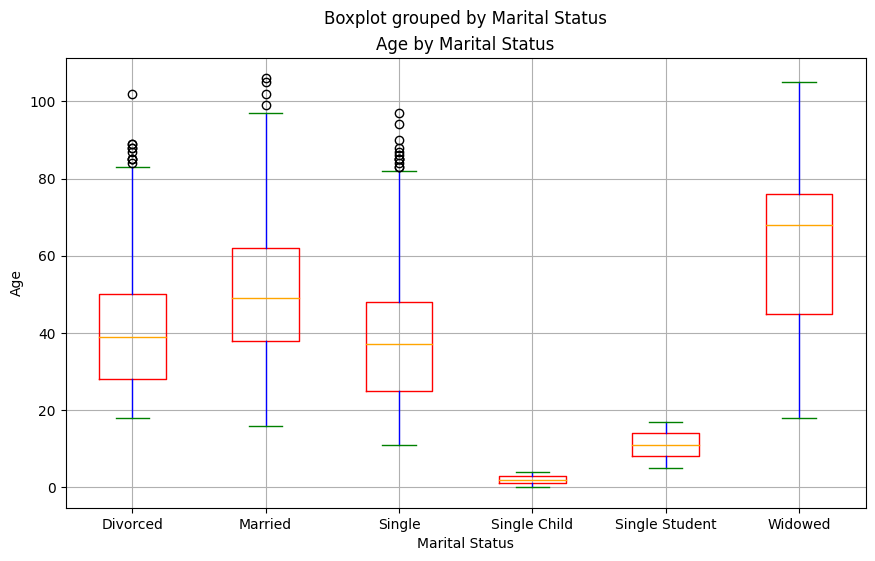

In [39]:
import matplotlib.pyplot as plt
# Define the colors for the box plot elements
colors = {
    'boxes': 'red',
    'whiskers': 'blue',
    'caps': 'green',
    'medians': 'orange'
}

# Create a box plot of the age column for each religion category with custom colors
census_dataframe.boxplot(column='Age', by='Marital Status', figsize=(10, 6), color=colors)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Age by Marital Status')

In [40]:
census_dataframe["Marital Status"].value_counts()

Single            2943
Married           2226
Single Student    1556
Divorced           744
Single Child       500
Widowed            360
Name: Marital Status, dtype: int64

In [41]:
census_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8328 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   Int64 
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 8329 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8321 non-null   object
 10  Religion                       6220 non-null   object
dtypes: Int64(1), int64(1), object(9)
memory usage: 724.0+ KB


# Infirmity Column

In [42]:
census_dataframe["Infirmity"].value_counts(dropna=False)

None                   8261
Physical Disability      17
Mental Disability        13
Blind                    10
Unknown Infection         8
NaN                       8
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

In [43]:
#Dispalying rows with NaN in the marital status page
mask_Infirmity = census_dataframe["Infirmity"].isna()
census_dataframe[mask_Infirmity]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
344,29,Gold Road,Joanna,Francis,65,Head,Single,Female,Clothing/textile technologist,NaN,Christian
462,13,Peninsula Drive,Lucy,Graham-Rogers,0,Daughter,Single Child,Female,Child,NaN,NaN
1284,182,Wessex Drive,Susan,Mills,50,Head,Single,Female,International aid/development worker,NaN,Christian
1587,9,Charity Road,Stewart,Brown,3,Son,Single Child,Male,Child,NaN,NaN
1630,18,Charity Road,Jade,Holmes,50,Head,Married,Female,Amenity horticulturist,NaN,None
1665,22,Charity Road,Adrian,Turner,6,Son,Single Student,Male,Student,NaN,NaN
7030,8,Naylor Crescent,Olivia,Porter,22,Head,Single,Female,University Student,NaN,None
8101,54,Kestrel Flat,Elizabeth,Singh,43,Head,Married,Female,Trading standards officer,NaN,Christian


In [44]:
#Replace the NaN values with None since most likely a blank value means no value was provided and most likely None
census_dataframe["Infirmity"] = census_dataframe["Infirmity"].fillna("None")

In [45]:
#Dispalying rows with NaN in the marital status page
mask_Infirmity = census_dataframe["Infirmity"].isna()
census_dataframe[mask_Infirmity]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [46]:
census_dataframe["Infirmity"].value_counts()

None                   8269
Physical Disability      17
Mental Disability        13
Blind                    10
Unknown Infection         8
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

# Religion Column

In [47]:
census_dataframe["Religion"].unique()

array(['Catholic', 'Methodist', 'None', nan, 'Christian', 'Sikh',
       'Muslim', 'Jewish', 'Buddist', 'Quaker'], dtype=object)

In [48]:
census_dataframe["Religion"].value_counts(dropna=False) 

None         2800
NaN          2109
Christian    1781
Catholic      881
Methodist     547
Muslim        115
Sikh           55
Jewish         38
Quaker          2
Buddist         1
Name: Religion, dtype: int64

In [49]:
import pandas as pd


# Filter the dataframe to only include rows where the religion column is not null and not 'None'
df_filtered = census_dataframe[(census_dataframe['Religion'].notnull()) & (census_dataframe['Religion'] != 'None')]

# Group the data by house number and street and count the frequency of each religion within each group
grouped = df_filtered.groupby(['House Number', 'Street'])['Religion'].value_counts()

# Calculate the percentage of people in each religion for each group
religion_percentage = grouped.groupby(level=[0, 1]).apply(lambda x: x / x.sum())

average_percentage = religion_percentage.groupby(level=2).mean()
average_percentage = average_percentage.apply(lambda x: f'{x:.2%}')
average_percentage

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6668\54725601.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  religion_percentage = grouped.groupby(level=[0, 1]).apply(lambda x: x / x.sum())


Religion
Buddist       25.00%
Catholic      85.38%
Christian     91.73%
Jewish        80.11%
Methodist     83.53%
Muslim        71.80%
Quaker       100.00%
Sikh          68.58%
Name: Religion, dtype: object

From the above, it is clear that the Quakers live alone in a household, while Christians also tend to live together in a single household, and Sikhs tend to be distributed among several households compared to other religions

In [50]:
import pandas as pd
import numpy as np

# define a function to impute missing values
def impute_religion(row):
    if pd.isnull(row['Religion']):
        if row['Age'] >= 16:
            house = row['House Number']
            street = row['Street']
            house_group = census_dataframe[(census_dataframe['House Number'] == house) & (census_dataframe['Street'] == street)]
            religion_counts = house_group['Religion'].value_counts()
            if not religion_counts.empty:
                top_religion = religion_counts.index[0]
                if top_religion in ['Christian', 'Catholic', 'Methodist', 'Muslim', 'Quaker']:
                    return top_religion
                else:
                    return np.nan
            else:
                return np.nan
        else:
            return 'unidentified-under 16'
    else:
        return row['Religion']

# apply the function to the DataFrame
census_dataframe['Religion'] = census_dataframe.apply(impute_religion, axis=1)

In [51]:
census_dataframe

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,Single Child,Female,Child,None,unidentified-under 16


In [52]:
census_dataframe["Religion"].value_counts()

None                     2800
Christian                1873
unidentified-under 16    1820
Catholic                  929
Methodist                 580
Muslim                    118
Sikh                       55
Jewish                     38
Quaker                      2
Buddist                     1
Name: Religion, dtype: int64

In [53]:
census_dataframe['Religion'] = census_dataframe['Religion'].fillna('Unknown>16')

In [54]:
census_dataframe["Religion"].value_counts()

None                     2800
Christian                1873
unidentified-under 16    1820
Catholic                  929
Methodist                 580
Muslim                    118
Unknown>16                113
Sikh                       55
Jewish                     38
Quaker                      2
Buddist                     1
Name: Religion, dtype: int64

# Data Analysis 

Age distribution of the population

In [55]:
import matplotlib.pyplot as plt

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


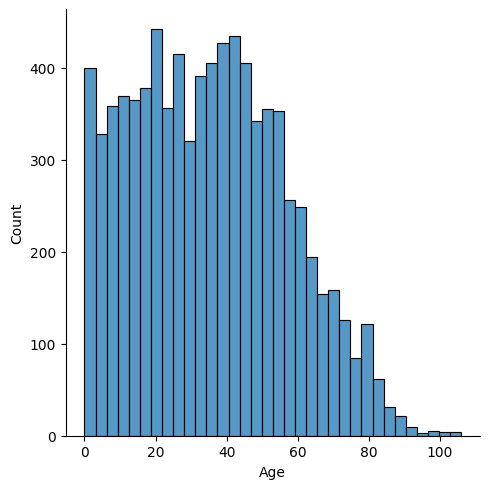

In [56]:
sns.displot(census_dataframe['Age'])

In [57]:
n_bins=round(np.sqrt(census_dataframe['Age'].nunique()))
print(n_bins)

10


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


Text(0.5, 1.0, 'Age Distribution')

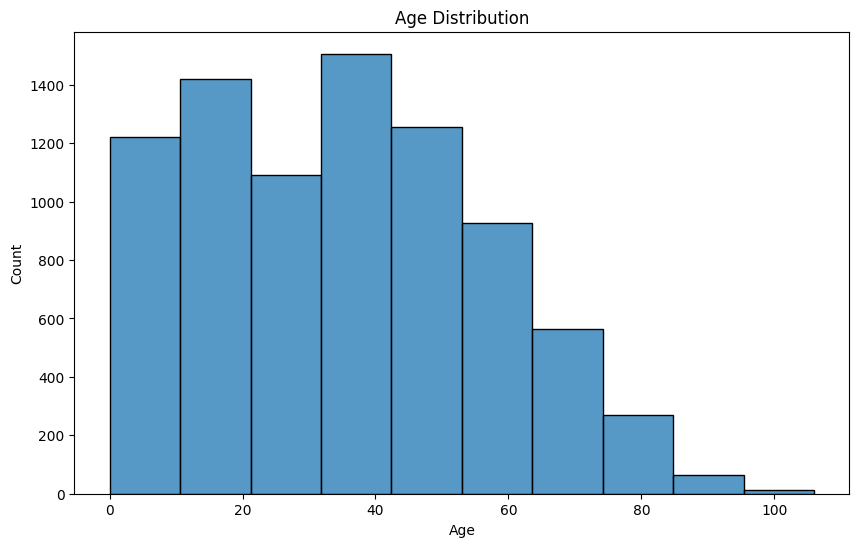

In [58]:
max_age = census_dataframe['Age'].max()
min_age = census_dataframe['Age'].min()
bin_width = int((max_age - min_age) / n_bins)

# Plot a histogram of the Age column with the calculated number of bins
plt.figure(figsize=(10, 6))
Age_univariate_plot=sns.histplot(data=census_dataframe, x='Age', bins=n_bins)
Age_univariate_plot.set_title('Age Distribution')

In [59]:
#creating two different dataframes for both males and females in the population
male_dataframe =  census_dataframe[ census_dataframe["Gender"] == "Male"]
female_dataframe =  census_dataframe[ census_dataframe["Gender"] == "Female"]

Male

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


Text(0.5, 1.0, 'Male Distribution')

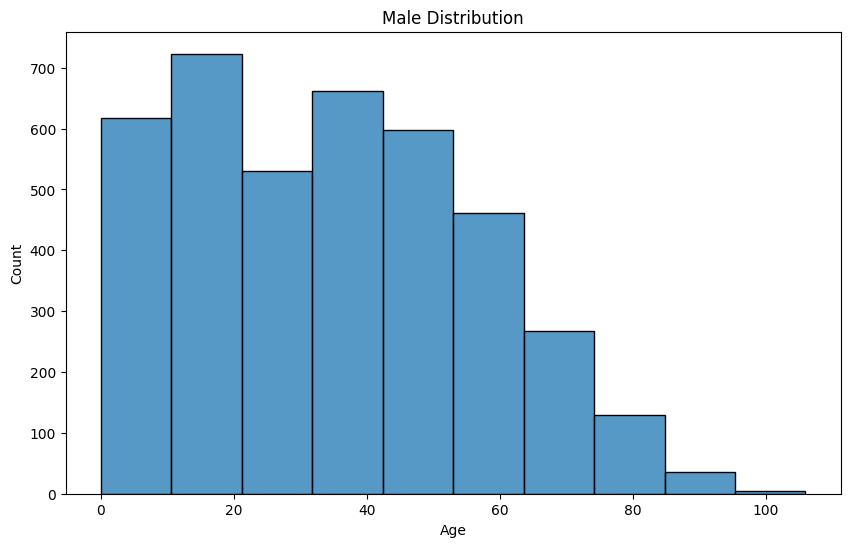

In [60]:
#Determine the number of Bins
male_n_bins=round(np.sqrt(male_dataframe['Age'].nunique()))
max_age = male_dataframe['Age'].max()
min_age = male_dataframe['Age'].min()
bin_width = int((max_age - min_age) / male_n_bins)

# Plot a histogram of the Age column with the calculated number of bins
plt.figure(figsize=(10, 6))
Male_univariate_plot=sns.histplot(data=male_dataframe, x='Age', bins=male_n_bins)
Male_univariate_plot.set_title('Male Distribution')

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


Text(0.5, 1.0, 'Female Distribution')

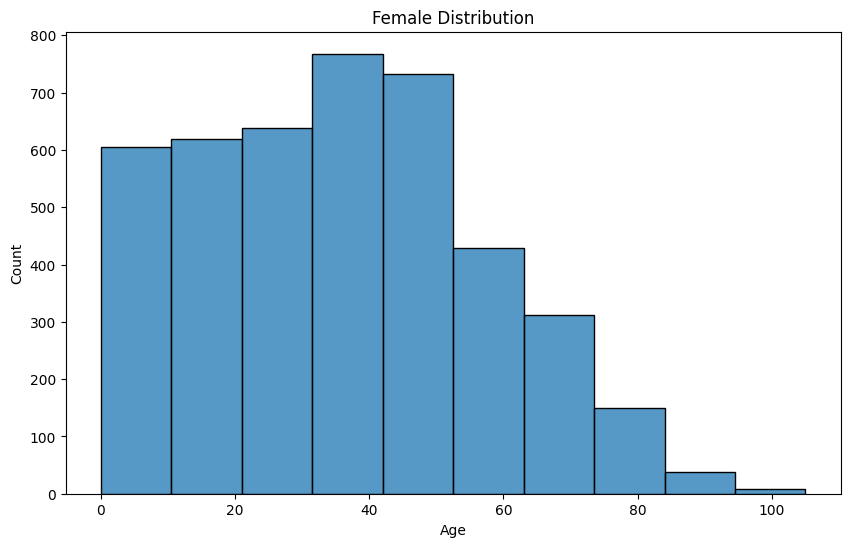

In [61]:
#Determine the number of Bins
female_n_bins=round(np.sqrt(male_dataframe['Age'].nunique()))
max_age = female_dataframe['Age'].max()
min_age = female_dataframe['Age'].min()
bin_width = int((max_age - min_age) / female_n_bins)

# Plot a histogram of the Age column with the calculated number of bins
plt.figure(figsize=(10, 6))
female_univariate_plot=sns.histplot(data=female_dataframe, x='Age', bins=male_n_bins)
female_univariate_plot.set_title('Female Distribution')

In [62]:
female_dataframe

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None
6,4,Scott Dale,Sophie,Akhtar,38,Head,Divorced,Female,Hydrographic surveyor,Physical Disability,None
9,5,Scott Dale,Natasha,Walker,32,None,Single,Female,"Surveyor, minerals",None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
8319,1,Jones Barracks,Eileen,Butler,27,Lodger,Single,Female,Armed forces technical officer,None,Catholic
8320,1,Walker Palace,Julie,Lane,28,Head,Married,Female,Public librarian,None,None
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,Single Child,Female,Child,None,unidentified-under 16


In [63]:
male_dataframe

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
5,3,Scott Dale,Norman,Patel,42,Husband,Married,Male,Higher education lecturer,None,None
7,4,Scott Dale,Jamie,Akhtar,7,Son,Single Student,Male,Student,None,unidentified-under 16
8,5,Scott Dale,Duncan,Law,29,Head,Single,Male,Trading standards officer,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8321,1,Walker Palace,Declan,Lane,31,Husband,Married,Male,Early years teacher,None,None
8322,1,Walker Palace,Kenneth,Lane,3,Son,Single Child,Male,Child,None,unidentified-under 16
8323,1,Walker Palace,Victor,Lane,0,Son,Single Child,Male,Child,None,unidentified-under 16
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim


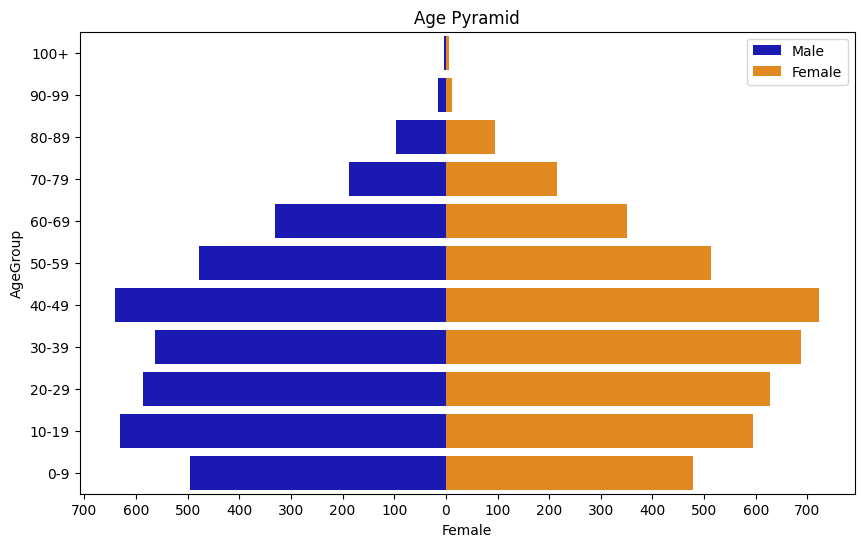

In [114]:
# Define age groups
age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, float('inf')]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

# Group data by age and gender and calculate the count of each group and put it the new Agegroup dataframe
census_dataframe['AgeGroup'] = pd.cut(census_dataframe['Age'], bins=age_bins, labels=age_labels, right=False)
grouped_data = census_dataframe.groupby(['AgeGroup', 'Gender']).size().reset_index(name='Count')

# Pivot data to create age_p DataFrame with age groups and counts for males and females
age_p = grouped_data.pivot(index='AgeGroup', columns='Gender', values='Count').reset_index()
#converting the male values to negative
age_p['Male'] = -age_p['Male']

# Create age pyramid chart using Seaborn barplot
plt.figure(figsize=(10, 6))
age_pyramid = sns.barplot(x='Male', y='AgeGroup', data=age_p, order=age_labels[::-1], color=('mediumblue'), label='Male')
age_pyramid = sns.barplot(x='Female', y='AgeGroup', data=age_p, order=age_labels[::-1], color=('darkorange'), label='Female')
age_pyramid.legend()
plt.xticks(ticks=[-700,-600,-500,-400,-300,-200, -100, 0, 100, 200, 300,400,500,600,700],
labels=["700","600","500","400","300","200", "100", "0", "100", "200", "300","400","500","600","700"])
plt.title('Age Pyramid')
plt.savefig('Age_Pyramid.png')

# Show chart
plt.show()

# Birth Rate

In [65]:
#Check children aged zero in the dataframe
age_zero = census_dataframe.loc[(census_dataframe['Age'] == 0)]

In [66]:
len(age_zero)

88

In [67]:
#Determine the number of women in the child bearing age from the census(25-29)
Female_cba = census_dataframe.loc[(census_dataframe['Age'] >= 25) & (census_dataframe['Age'] <= 29)& (census_dataframe['Gender'] == 'Female')]

In [68]:
len(Female_cba)

266

In [69]:
Birthrates =(len(age_zero))/(len(Female_cba))*100000
print(Birthrates)

33082.70676691729


# Evolving Birthrate

In [70]:
#Number of children age four
age_four = census_dataframe.loc[(census_dataframe['Age'] == 4)]
print(len(age_four))

100


In [71]:
#Determine the number of women in the child bearing age from the census(30-34)
Female_evo = census_dataframe.loc[(census_dataframe['Age'] >= 30) & (census_dataframe['Age'] <= 34) & (census_dataframe['Gender'] == 'Female')]
print(len(Female_evo))

333


In [72]:
#increase in Birthrate per 100,000 
Evolving_Birthrate=((len(age_four))/(len(Female_evo)))*100000
print(Evolving_Birthrate)                    

30030.03003003003


Both the Birthrate and the evolving bithrate is a by taking assumptions that female at that age gave birth to children at age 0 and 4, based on their fertility assumption. This is just fertlity of the town, below is futher calculation of Birthrates based on the age groups and it shows a drop in birthrates even with an improved firtility rate.

# Birthrates by looking at the age groups

In [73]:
#Determine the number of aging population between (0 and 5)
Age_range11 = census_dataframe.loc[(census_dataframe['Age'] >= 0) & (census_dataframe['Age'] <= 5)]
#Determine the number of aging population between (6 and 10)
Age_range12 = census_dataframe.loc[(census_dataframe['Age'] >= 6) & (census_dataframe['Age'] <= 10)]
Birthrate1=((len(Age_range11))-(len(Age_range12)))/5
Birthrate1

-0.8

In [74]:
#Determine the number of aging population between (11 and 15)
Age_range13 = census_dataframe.loc[(census_dataframe['Age'] >= 11) & (census_dataframe['Age'] <= 15)]
#Determine the number of aging population between (16 and 20)
Age_range14 = census_dataframe.loc[(census_dataframe['Age'] >= 16) & (census_dataframe['Age'] <= 20)]
Birthrate2=((len(Age_range13))-(len(Age_range14)))/5
Birthrate2

-15.2

In [75]:
#Total population above 55 years
Age_range20 = census_dataframe.loc[(census_dataframe['Age'] >= 0)& (census_dataframe['Age'] <= 20)]
Age_20=(len(Age_range20)) 
Age_20

2496

In [76]:
Birthrates=((Birthrate1+Birthrate2)/Age_20)*100000
Birthrates

-641.025641025641

The negative birthrates means there is there is a decline of birthrate per 100,000 people as compared to the other years, this can be as result of improved medical care and access to family planning services, also the economic situation, most women are jobless and may fear raising children without a source of income.

# Deathrate

In [77]:
#Determine the number of aging population between (56 and 60)
Age_range1 = census_dataframe.loc[(census_dataframe['Age'] >= 56) & (census_dataframe['Age'] <= 60)]
#Determine the number of aging population between (61 and 65)
Age_range2 = census_dataframe.loc[(census_dataframe['Age'] >= 61) & (census_dataframe['Age'] <= 65)]
Deathrate1=((len(Age_range1))-(len(Age_range2)))/5
Deathrate1

15.6

In [78]:
#Determine the number of aging population between (66 and 70)
Age_range3 = census_dataframe.loc[(census_dataframe['Age'] >= 66) & (census_dataframe['Age'] <= 70)]
#Determine the number of aging population between (71 and 75)
Age_range4 = census_dataframe.loc[(census_dataframe['Age'] >= 71) & (census_dataframe['Age'] <= 75)]
Deathrate2=((len(Age_range3))-(len(Age_range4)))/5
Deathrate2

11.0

In [79]:
#Determine the number of aging population between (76 and 80)
Age_range5 = census_dataframe.loc[(census_dataframe['Age'] >= 76) & (census_dataframe['Age'] <= 80)]
#Determine the number of aging population between (81 and 85)
Age_range6 = census_dataframe.loc[(census_dataframe['Age'] >= 81) & (census_dataframe['Age'] <= 85)]
Deathrate3=((len(Age_range5))-(len(Age_range6)))/5
Deathrate3

6.4

In [80]:
#Determine the number of aging population between (86 and 90)
Age_range7 = census_dataframe.loc[(census_dataframe['Age'] >= 86) & (census_dataframe['Age'] <= 90)]
#Determine the number of aging population between (91 and 95)
Age_range8 = census_dataframe.loc[(census_dataframe['Age'] >= 91) & (census_dataframe['Age'] <= 95)]
Deathrate4=((len(Age_range7))-(len(Age_range8)))/5
Deathrate4

5.2

In [81]:
#Determine the number of aging population between (96 and 90)
Age_range9 = census_dataframe.loc[(census_dataframe['Age'] >= 96) & (census_dataframe['Age'] <= 100)]
#Determine the number of aging population between (101 and 105)
Age_range10 = census_dataframe.loc[(census_dataframe['Age'] >= 101) & (census_dataframe['Age'] <= 105)]
Deathrate5=((len(Age_range9))-(len(Age_range10)))/5
Deathrate5

-0.4

In [82]:
#Total population above 55 years
Age_range55 = census_dataframe.loc[(census_dataframe['Age'] >= 55)]
Age_55=(len(Age_range55)) 
Age_55

1649

In [83]:
#overall deathrates above 55 years
overalldeathrate=Deathrate4+Deathrate5+Deathrate3+Deathrate2+Deathrate1
overalldeathrate

37.8

In [84]:
#Deathrate per 100,000   
Deathrate=(overalldeathrate/Age_55)*100000
Deathrate

2292.2983626440264

Above is the current deathrate per 100000 people in the community, this was taken from the deaths of those above 55 years and assumption that there was no migration over this age group as most of them are retired

# Commuters

In [85]:
census_dataframe['Occupation'].unique()

array(['Engineer, building services', 'Engineer, mining', 'Unemployed',
       ..., 'Retired Multimedia programmer',
       'Retired Commercial/residential surveyor',
       'Retired Control and instrumentation engineer'], dtype=object)

In [86]:
#Assumption that the people to attend or work at the university, since it is the only facility not present in the area.
# Define a list of occupations to keep
commute_data = ['Higher education lecturer', 'University Student', 'Research scientist (physical sciences)', 'Scientific laboratory technician', 'Lecturer, higher education', 'Lecturer, further education', 'Research scientist (medical)','Research scientist (maths)', 'PhD Student', 'Higher education careers adviser', 'Research scientist (life sciences)', 'Academic librarian']

# Filter data to only keep rows where the Occupation column contains one of the specified occupation values
commuter_data = census_dataframe[census_dataframe['Occupation'].isin(commute_data)]

# Print the filtered data
commuter_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup
5,3,Scott Dale,Norman,Patel,42,Husband,Married,Male,Higher education lecturer,None,None,40-49
19,8,Scott Dale,Teresa,Ball,22,Daughter,Single,Female,University Student,None,Christian,20-29
34,13,Scott Dale,Amy,Dennis,19,Wife,Married,Female,University Student,None,None,20-29
45,19,Scott Dale,Derek,Todd,21,Head,Married,Male,University Student,None,Christian,20-29
46,19,Scott Dale,Maureen,Todd,19,Wife,Married,Female,University Student,None,Christian,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...
8305,1,Jones Barracks,Andrew,Stevenson,20,Son,Single,Male,University Student,None,None,20-29
8306,1,Jones Barracks,Ruth,Stevenson,20,Daughter,Divorced,Female,University Student,None,None,20-29
8313,1,Jones Barracks,Emma,Price,20,Lodger,Single,Female,University Student,None,Christian,20-29
8315,1,Jones Barracks,Joe,Ellis,21,Lodger,Single,Male,University Student,None,Methodist,20-29


In [87]:
#percentage  of commute population in relation to the entire population
cummuters_Percentage = (len(commuter_data)/len(census_dataframe))*100
print(cummuters_Percentage)

7.924120542682195


Above is the ratio of commutters to the current total population in the area.

# Religion

In [88]:
# group the DataFrame by Religion
grouped = census_dataframe.groupby('Religion')

# compute the mean age for each religion
mean_age = grouped['Age'].mean()

# compute the median age for each religion
median_age = grouped['Age'].median()

# compute the mode age for each religion
mode_age = grouped['Age'].agg(lambda x: x.mode().iat[0])

# compute the range of ages for each religion
age_range = grouped['Age'].agg(lambda x: x.max() - x.min())

# compute the inter-quartile range of ages for each religion
iqr = grouped['Age'].quantile(0.75) - grouped['Age'].quantile(0.25)

# compute the total number of people for each religion
total_people = grouped.size()

# create a summary DataFrame
summary = pd.DataFrame({
    'Total People': total_people,
    'Mean Age': mean_age,
    'Median Age': median_age,
    'Mode Age': mode_age,
    'Age Range': age_range,
    'Inter-Quartile Range': iqr
})
summary

,Total People,Mean Age,Median Age,Mode Age,Age Range,Inter-Quartile Range
Religion,,,,,,
Buddist,1,32.0,32.0,32,0,0.00
Catholic,929,41.454252,41.0,44,90,19.00
Christian,1873,48.128671,49.0,53,94,28.00
Jewish,38,46.842105,44.0,44,52,24.50
Methodist,580,42.648276,40.5,40,82,28.00
Muslim,118,35.728814,31.0,29,85,11.75
None,2800,41.538214,40.0,41,86,22.25
Quaker,2,21.5,21.5,20,3,1.50
Sikh,55,34.290909,31.0,24,65,14.00


The age range for Catholics is 90 years, for Christians it is 94 years, and for Methodists it is 82 years. This suggests that these religions are associated with both older and younger people.

However, some religions have a smaller age range among their adherents. For example, the age range for Quakers is only 3 years and for Buddhists it is 0 years (since there is only one Buddhist in the data). This suggests that these religions may be associated with a narrower age group

Text(0.5, 1.0, 'Age by Religion')

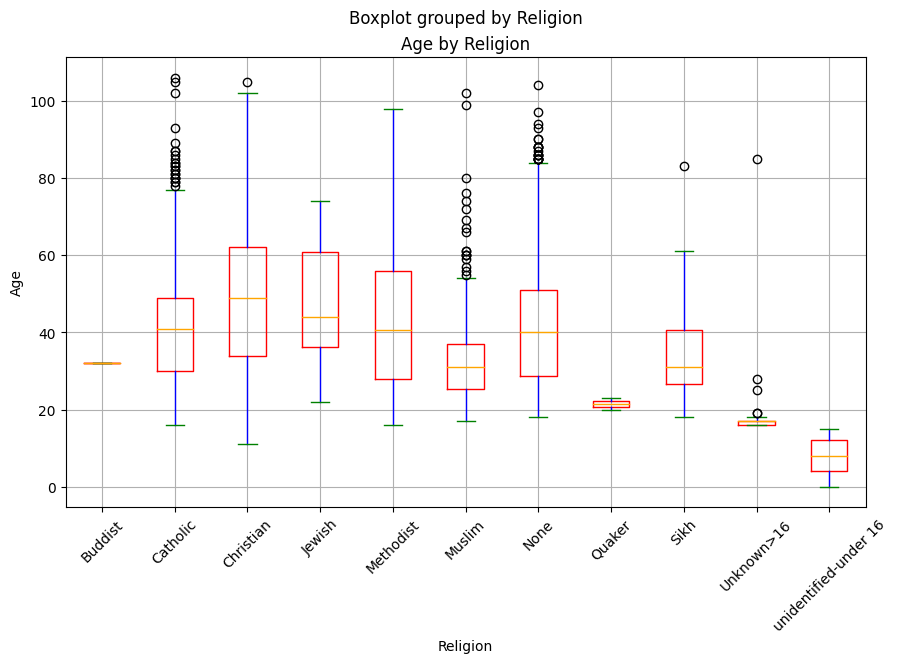

In [89]:
# Define the colors for the box plot elements
colors = {
    'boxes': 'red',
    'whiskers': 'blue',
    'caps': 'green',
    'medians': 'orange'
}

# Create a box plot of the age column for each religion category with custom colors
census_dataframe.boxplot(column='Age', by='Religion', figsize=(10, 6), color=colors)
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Religion')
plt.ylabel('Age')
plt.title('Age by Religion')

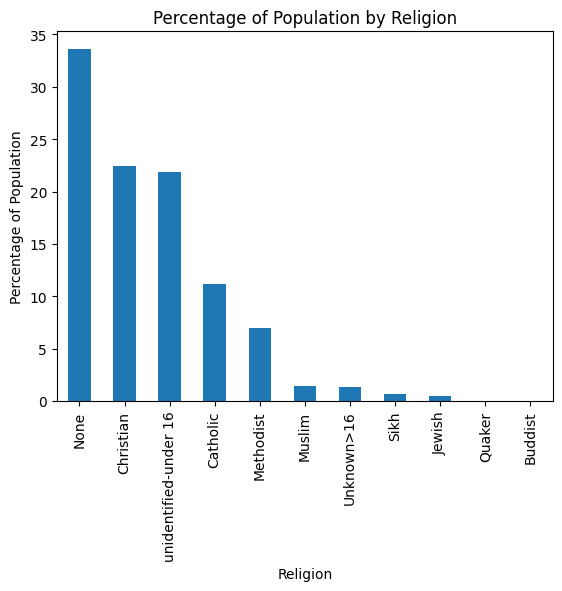

In [90]:
# Count the number of people of each religion
religion_counts = census_dataframe['Religion'].value_counts()

# Calculate the percentage of each religion
religion_percentages = religion_counts / len(census_dataframe) * 100

# Create a bar chart
religion_percentages.plot(kind='bar')

# Add labels and title
plt.xlabel('Religion')
plt.ylabel('Percentage of Population')
plt.title('Percentage of Population by Religion')

# Show the plot
plt.show()

In [91]:
def prob_same_religion(df):
    # Make a copy of the dataframe
    df = df.copy()
    
    # Filter dataframe to only include rows where Relationship to Head of House is 'Son', 'Daughter', or 'Head'
    df = df[df['Relationship to Head of House'].isin(['Son', 'Daughter', 'Head'])]
    
    # Group by house number and street
    grouped = df.groupby(['House Number', 'Street'])
    
    # Initialize counts
    total_count = 0
    same_religion_counts = {}
    
    # Iterate over groups
    for name, group in grouped:
        # Get head of house religion
        head_religion = group[group['Relationship to Head of House'] == 'Head']['Religion'].iloc[0]
        
        # Get son and daughter religions
        son_daughter_religions = group[group['Relationship to Head of House'].isin(['Son', 'Daughter'])]['Religion']
        
        # Increment counts
        for religion in son_daughter_religions:
            if religion == head_religion:
                if religion in same_religion_counts:
                    same_religion_counts[religion] += 1
                else:
                    same_religion_counts[religion] = 1
            
            total_count += 1
    
    # Calculate probabilities
    probs = {religion: count / total_count * 100 for religion, count in same_religion_counts.items()}
    
    return probs

# Example usage:
probs = prob_same_religion(census_dataframe)
for religion, prob in probs.items():
    print(f'{religion}: {prob:.2f}%')

None: 10.46%
Christian: 11.79%
Catholic: 3.82%
Methodist: 3.79%
Jewish: 0.14%
Muslim: 0.43%


Above is percentage probabilities that either the child born(son/ daugher) will take the religion of the head of the house, for instance in a christian household 11.7% of the children will take the religion of the head of the house

# Migration

In [92]:
#Immigrants into the town are most likely those who are visitors, lodgers, 
#Those with no relation with the head of the house
#University students who are head of the house


In [93]:
Immigration_df = census_dataframe[((census_dataframe['Relationship to Head of House'] == 'Lodger') |
                         (census_dataframe['Relationship to Head of House'] == 'Visitor') |
                         (census_dataframe['Relationship to Head of House'] == 'None')) |
                        ((census_dataframe['Relationship to Head of House'] == 'Head') & (census_dataframe['Occupation'].str.contains('university student', case=False)))]

In [94]:
Immigration_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup
9,5,Scott Dale,Natasha,Walker,32,None,Single,Female,"Surveyor, minerals",None,Catholic,30-39
10,5,Scott Dale,Mohamed,Slater,62,None,Single,Male,Clinical psychologist,None,Christian,60-69
45,19,Scott Dale,Derek,Todd,21,Head,Married,Male,University Student,None,Christian,20-29
54,22,Scott Dale,Ronald,Ingram,34,Lodger,Single,Male,Broadcast engineer,None,None,30-39
55,22,Scott Dale,Diana,Gill,20,Lodger,Divorced,Female,University Student,None,None,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...
8316,1,Jones Barracks,Brett,Lowe,25,Lodger,Divorced,Male,Secretary/administrator,None,None,20-29
8317,1,Jones Barracks,Amber,Nicholson,47,Lodger,Single,Female,Higher education careers adviser,None,Christian,40-49
8318,1,Jones Barracks,Hollie,Moore,58,Lodger,Divorced,Female,"Investment banker, corporate",None,None,50-59
8319,1,Jones Barracks,Eileen,Butler,27,Lodger,Single,Female,Armed forces technical officer,None,Catholic,20-29


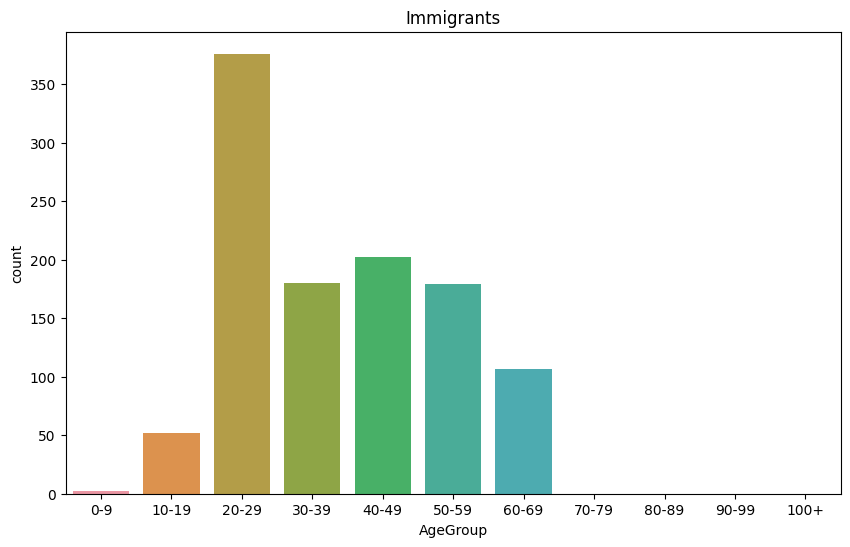

In [95]:
# Create a countplot of the age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=Immigration_df)
plt.title("Immigrants")
plt.show()

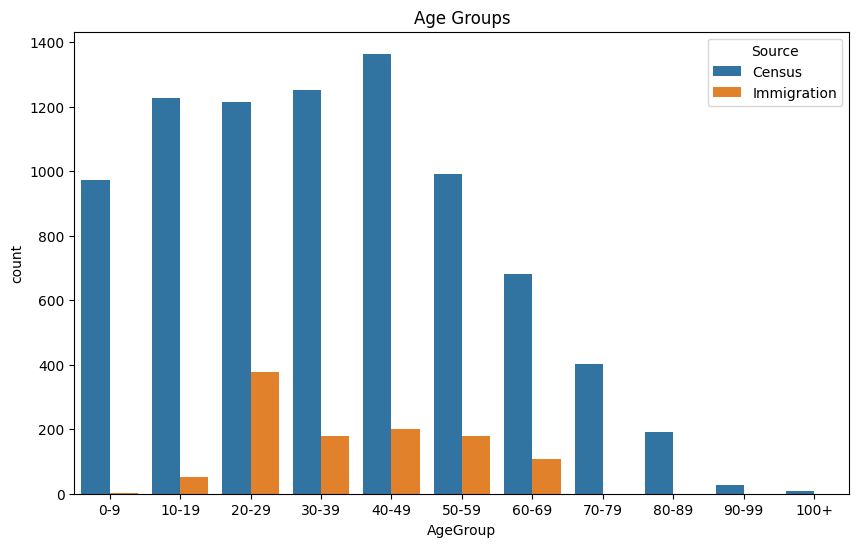

In [96]:
#creating copies of the dataframes
census_dataframe_copy = census_dataframe.copy()
immigration_copy = Immigration_df.copy()

# Add a new column to indicate the source
census_dataframe_copy['Source'] = 'Census'
immigration_copy['Source'] = 'Immigration'

# Combine the two data frames into a single data frame
combined_df = pd.concat([census_dataframe_copy, immigration_copy])

# Create a countplot of the age groups with hue as the source
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Source', data=combined_df)
plt.title("Age Groups")
plt.show()

Emmigrants

In [97]:
# Create a boolean mask for each condition
#Visitors will eventually leave at a given point
cond1 = (census_dataframe['Relationship to Head of House'] == 'Visitor')
cond2 = ((census_dataframe['Relationship to Head of House'] == 'Head') & (census_dataframe['Occupation'].str.contains('university student', case=False)))
cond3 = ((census_dataframe['Relationship to Head of House'] == 'None') & (census_dataframe['Occupation'].isin(['University Student', 'Armed forces technical officer', 'PhD Student'])))
cond4 = ((census_dataframe['Relationship to Head of House'] == 'Lodger') & (census_dataframe['Marital Status'] == 'Divorced'))
cond5 = ((census_dataframe['Relationship to Head of House'] == 'Lodger') & (census_dataframe['Occupation'].str.contains('student', case=False)))
cond6 = ((census_dataframe['Relationship to Head of House'] == 'Lodger') & (census_dataframe['Occupation'].str.contains('university student', case=False)))
# Combine the boolean masks using the OR operator
mask = cond1 | cond2 | cond3 | cond4 | cond5 | cond6

# Filter the rows of the data frame using the boolean mask
emigrantion_df = census_dataframe[mask]

In [98]:
emigrantion_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup
45,19,Scott Dale,Derek,Todd,21,Head,Married,Male,University Student,None,Christian,20-29
55,22,Scott Dale,Diana,Gill,20,Lodger,Divorced,Female,University Student,None,None,20-29
56,22,Scott Dale,Ronald,Johnson,46,Visitor,Single,Male,"Programmer, systems",None,Christian,40-49
96,11,Lee Shoal,Natasha,Whitehouse,22,None,Single,Female,University Student,None,Methodist,20-29
118,20,Lee Shoal,Sam,White,19,None,Single,Male,University Student,None,Muslim,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...
8197,22,Lloyd Drive,Diane,Thompson,41,Visitor,Single,Female,Unemployed,None,None,40-49
8313,1,Jones Barracks,Emma,Price,20,Lodger,Single,Female,University Student,None,Christian,20-29
8315,1,Jones Barracks,Joe,Ellis,21,Lodger,Single,Male,University Student,None,Methodist,20-29
8316,1,Jones Barracks,Brett,Lowe,25,Lodger,Divorced,Male,Secretary/administrator,None,None,20-29


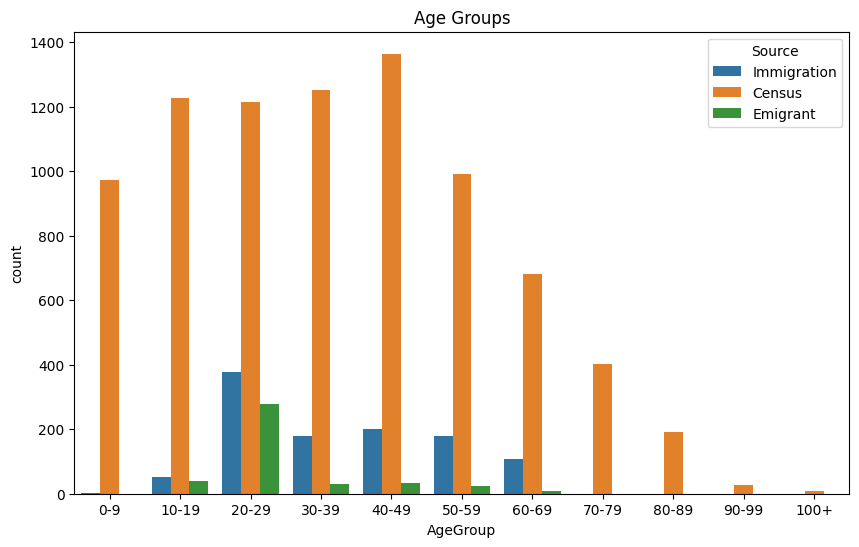

In [99]:
#creating copies of the dataframes
census_dataframe_copy = census_dataframe.copy()
immigration_copy = Immigration_df.copy()
emigrantion_copy=emigrantion_df.copy()

# Add a new column to indicate the source
census_dataframe_copy['Source'] = 'Census'
immigration_copy['Source'] = 'Immigration'
emigrantion_copy['Source'] = 'Emigrant'

# Combine the two data frames into a single data frame
combined_df = pd.concat([immigration_copy, census_dataframe_copy, emigrantion_copy ])

# Create a countplot of the age groups with hue as the source
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Source', data=combined_df)
plt.title("Age Groups")
plt.show()

From the above it is clear that migration adds to the total population of the area. Between the age of 20 -29 years, we have more migration into and also out of town, these are most likey univeristy students. Between the ages of 30-69 years we have more immigration as compared to emigration. These are most likely adults looking for work and some who are working.

# Occupation and Unemployment

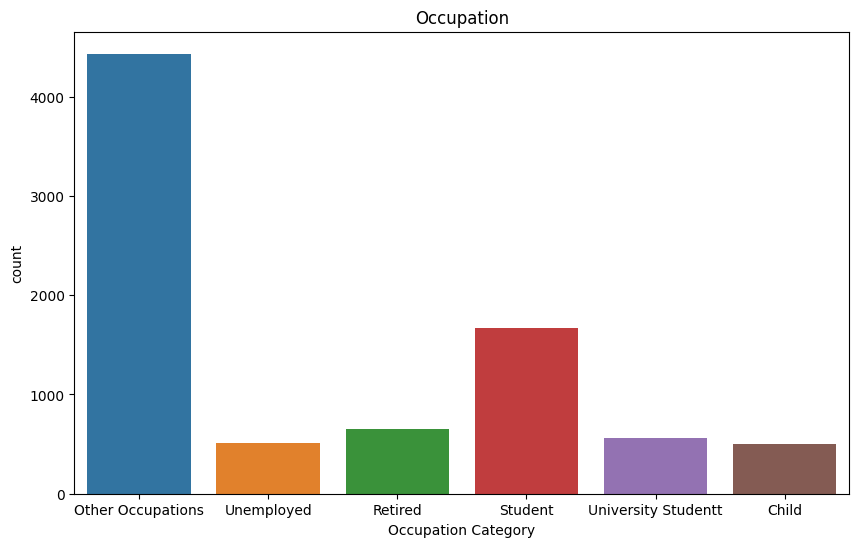

In [100]:
# Define a custom function to map the occupation values to categories
def categorize_occupation(occupation):
    if occupation == 'Unemployed':
        return 'Unemployed'
    elif occupation == 'Child':
        return 'Child'
    elif occupation == 'University Student':
        return 'University Studentt'
    elif occupation == 'Student':
        return 'Student'
    elif 'Retired' in occupation:
        return 'Retired'
    else:
        return 'Other Occupations'

# Create a new column for occupation category
census_dataframe['Occupation Category'] = census_dataframe['Occupation'].apply(categorize_occupation)

# Create a countplot of the occupation categories

plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation Category', data=census_dataframe)
Age_range55
plt.title("Occupation")
plt.savefig('Occupation.png')
plt.show()

The Figure above clearly shows that we currently have a higher student population as compared to the unemployed and the retired population. However, with the high immigration into town, in a few years, those in the other occupations category will soon retire and we shall have a higher retired population that will require more retirement homes

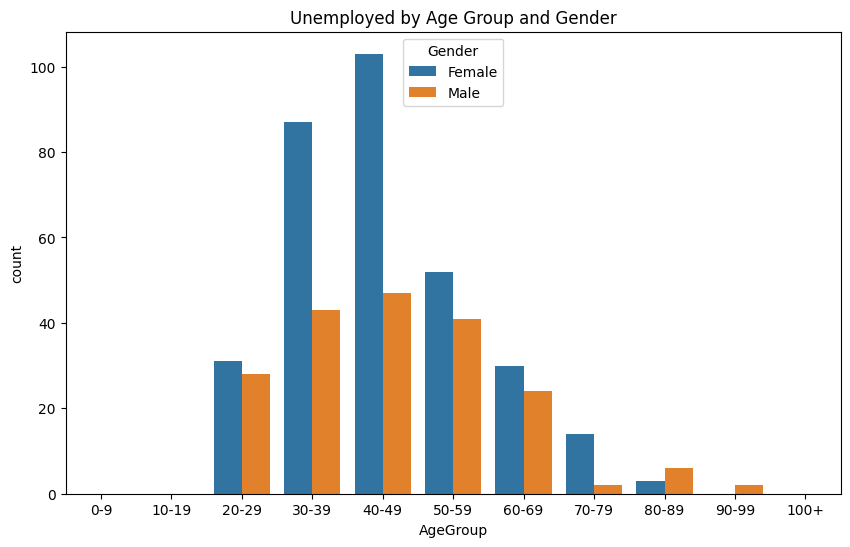

In [101]:
# Filter the rows where the occupation is unemployed
unemployed_df = census_dataframe[census_dataframe['Occupation'] == 'Unemployed']

# Create a countplot of the age groups with hue as the gender
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Gender', data=unemployed_df)
plt.title("Unemployed by Age Group and Gender")
plt.savefig('Unemployed by Age Group and Gender.png')
plt.show()

In [102]:
unemployed_df['Age'].describe().T

count        513.0
mean     44.169591
std      13.542774
min           22.0
25%           34.0
50%           42.0
75%           52.0
max           95.0
Name: Age, dtype: Float64

# Household Occupancy

In [103]:
#Creat a new column of household occupancy
census_dataframe['household_occupancy'] = census_dataframe.groupby(['House Number', 'Street'])['House Number'].transform('count')

In [104]:
census_dataframe

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup,Occupation Category,household_occupancy
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic,50-59,Other Occupations,2
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic,50-59,Other Occupations,2
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist,70-79,Unemployed,2
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist,70-79,Retired,2
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None,30-39,Other Occupations,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim,50-59,Unemployed,5
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian,40-49,Other Occupations,4
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian,40-49,Other Occupations,4
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,Single Child,Female,Child,None,unidentified-under 16,0-9,Child,4


In [105]:
census_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8329 non-null   int64   
 1   Street                         8329 non-null   object  
 2   First Name                     8328 non-null   object  
 3   Surname                        8329 non-null   object  
 4   Age                            8329 non-null   Int64   
 5   Relationship to Head of House  8329 non-null   object  
 6   Marital Status                 8329 non-null   object  
 7   Gender                         8329 non-null   object  
 8   Occupation                     8329 non-null   object  
 9   Infirmity                      8329 non-null   object  
 10  Religion                       8329 non-null   object  
 11  AgeGroup                       8329 non-null   category
 12  Occupation Category            832

In [106]:
census_dataframe["household_occupancy"].unique()

array([ 2,  3,  1,  4,  5,  6,  7,  9, 10, 11, 12, 15, 16,  8, 18, 22, 20,
       14], dtype=int64)

In [107]:
census_dataframe['household_occupancy'].value_counts().sort_index()

1      697
2     1450
3     1338
4     1916
5     1565
6      480
7      147
8       72
9       81
10     100
11     110
12     144
14      14
15      45
16      32
18      54
20      40
22      44
Name: household_occupancy, dtype: int64

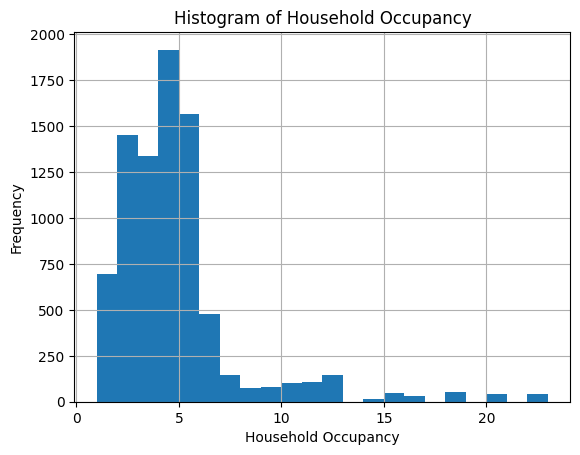

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# create a histogram of the household_occupancy column
census_dataframe['household_occupancy'].hist(bins=range(1, census_dataframe['household_occupancy'].max()+2))

# add labels and title
plt.xlabel('Household Occupancy')
plt.ylabel('Frequency')
plt.title('Histogram of Household Occupancy')

# display the plot
plt.show()

From the above Histogram, it is clear that the there is more people live in groups of between 1 and 5 people in a house,we also have 44 houses that can hold upto 22 people, this means this are the kind structures that can handl increasing poplution as more people can share a building 

# Marital Status and Divorce Rates

In [109]:
#group the data by marital status and gender and calculate descriptive statistics for the age column
age_statistics = census_dataframe.groupby(['Marital Status', 'Gender'])['Age'].describe()
age_statistics

count       mean        std   min   25%   50%   75%  \
Marital Status Gender                                                         
Divorced       Female   445.0  41.833708  15.973493  18.0  30.0  40.0  51.0   
               Male     299.0  39.719064  17.743928  18.0  25.0  37.0  49.5   
Married        Female  1117.0  49.273053  15.822371  16.0  37.0  48.0  60.0   
               Male    1109.0  51.356177  16.048334  18.0  39.0  50.0  63.0   
Single         Female  1532.0  37.875979  14.266898  18.0  25.0  37.0  48.0   
               Male    1411.0  37.489724  14.046695  11.0  25.0  36.0  48.0   
Single Child   Female   247.0   2.153846   1.402892   0.0   1.0   2.0   3.0   
               Male     253.0   2.043478   1.351838   0.0   1.0   2.0   3.0   
Single Student Female   755.0  10.931126   3.716123   5.0   8.0  11.0  14.0   
               Male     801.0  11.092385   3.714694   5.0   8.0  11.0  14.0   
Widowed        Female   206.0  62.825243  20.236132  18.0  45.0  69.0  76.0   
               Male     154.0  61.045455  20.587877  18.0  45.0  67.5  76.0   

                         max  
Marital Status Gender         
Divorced       Female   88.0  
               Male    102.0  
Married        Female  105.0  
               Male    106.0  
Single         Female   97.0  
               Male     88.0  
Single Child   Female    4.0  
               Male      4.0  
Single Student Female   17.0  
               Male     17.0  
Widowed        Female  105.0  
               Male     95.0

The information on the Divorced rate shows that there are more divorced females as compared to males, the possibility of this that some divorced females moved into the town or divorced males left the town, We also have more widowed females ads compared to males, a case that maybe more married men died as compared to females, or some widowed females moved into the town.

Text(0.5, 1.0, 'Age by Marital Status')

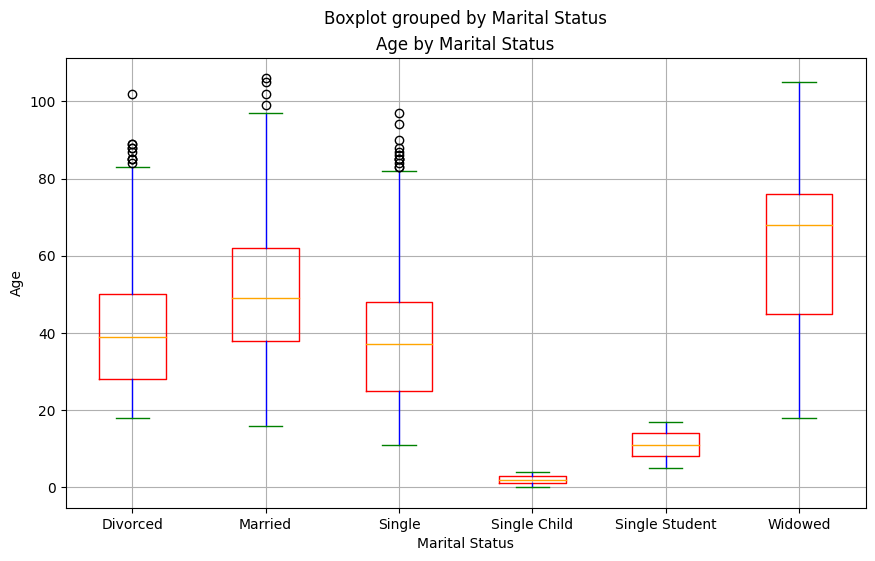

In [110]:
import matplotlib.pyplot as plt
# Define the colors for the box plot elements
colors = {
    'boxes': 'red',
    'whiskers': 'blue',
    'caps': 'green',
    'medians': 'orange'
}

# Create a box plot of the age column for each religion category with custom colors
census_dataframe.boxplot(column='Age', by='Marital Status', figsize=(10, 6), color=colors)

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Age by Marital Status')

The mean Divorce age is lower than the married age, so it means at the age of 39, most couples have a higer chances of divorce than later in life, the sigle and divorced have a closer mean age. People are likey to get widowed later in life at around age 62 years. in terms of housing and based on the data, we need a hosehold that can host more memmber as at around the age 45 according to the age pyramid is when people are actually married and have a family hence require high density housing

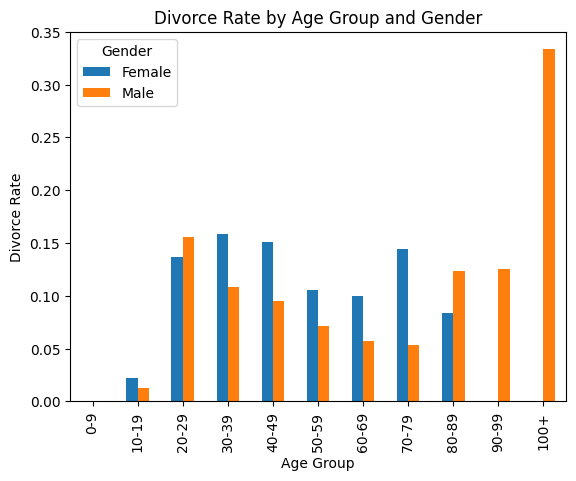

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate the divorce rate by age group and gender
divorce_rate = census_dataframe[census_dataframe['Marital Status'] == 'Divorced'].groupby(['AgeGroup', 'Gender']).size() / census_dataframe.groupby(['AgeGroup', 'Gender']).size()

# unstack the data to create a bar chart
divorce_rate.unstack().plot(kind='bar')

# add labels and title
plt.xlabel('Age Group')
plt.ylabel('Divorce Rate')
plt.title('Divorce Rate by Age Group and Gender')

# display the plot
plt.show()

The graph shows clearly females have a  higher divorce rate than the males between the age of 30 to 79 years, however it clear that females remain within the town after a divorce as compared to males.

In [112]:
census_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8329 non-null   int64   
 1   Street                         8329 non-null   object  
 2   First Name                     8328 non-null   object  
 3   Surname                        8329 non-null   object  
 4   Age                            8329 non-null   Int64   
 5   Relationship to Head of House  8329 non-null   object  
 6   Marital Status                 8329 non-null   object  
 7   Gender                         8329 non-null   object  
 8   Occupation                     8329 non-null   object  
 9   Infirmity                      8329 non-null   object  
 10  Religion                       8329 non-null   object  
 11  AgeGroup                       8329 non-null   category
 12  Occupation Category            832

In [113]:
census_dataframe

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup,Occupation Category,household_occupancy
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic,50-59,Other Occupations,2
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic,50-59,Other Occupations,2
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist,70-79,Unemployed,2
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist,70-79,Retired,2
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None,30-39,Other Occupations,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim,50-59,Unemployed,5
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian,40-49,Other Occupations,4
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian,40-49,Other Occupations,4
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,Single Child,Female,Child,None,unidentified-under 16,0-9,Child,4
